### Training Dataset Processing

In [1]:
import pandas as pd


In [3]:
training_df = pd.read_csv(path+"train_data\\train_data.csv")

<ipython-input-3-c00b58e119e7>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  training_df = pd.read_csv(path+"train_data\\train_data.csv")


In [4]:
training_df.shape

(982644, 9)

In [5]:
training_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [6]:
training_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### EDA

#### Q.1. Data Description

In [7]:
training_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


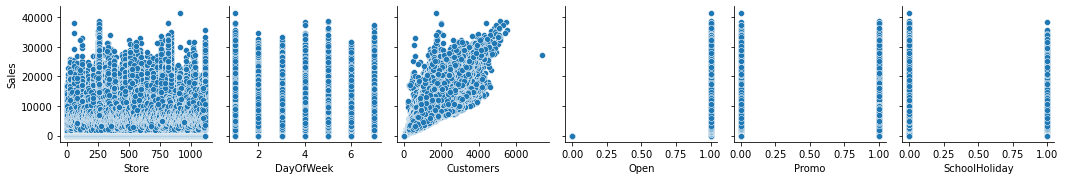

In [8]:
import seaborn as sns

sns.pairplot(training_df, x_vars = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday'], y_vars = ['Sales'])

In [9]:
training_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
training_df['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

In [11]:
training_df['Promo'].unique()

array([1, 0], dtype=int64)

In [12]:
training_df['Open'].unique()

array([1, 0], dtype=int64)

In [13]:
training_df['DayOfWeek'].unique()

array([2, 1, 7, 6, 5, 4, 3], dtype=int64)

#### Q.2. One-hot Encoding

In [14]:
from sklearn import preprocessing
from copy import deepcopy

training_df_encode = deepcopy(training_df)

training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(str)
le = preprocessing.LabelEncoder()
training_df_encode['StateHoliday'] = le.fit_transform(training_df_encode['StateHoliday'].fillna(""))
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(int)

StateHoliday_LE_Map = dict(zip(le.classes_, le.transform(le.classes_)))
StateHoliday_LE_Map_reverse = dict(zip(le.transform(le.classes_), le.classes_))

In [15]:
training_df_encode['StateHoliday'].unique()

array([0, 1, 2, 3])

#### Q.3. Correlation of All Features with Target Variable "Sales" 

##### Corrlation for All Stores Single Model

In [16]:
training_df_encode = training_df_encode[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
training_df_encode.corr()['Sales']

Store            0.005338
Customers        0.895700
Open             0.679248
Promo            0.451383
StateHoliday    -0.232119
SchoolHoliday    0.076141
Sales            1.000000
Name: Sales, dtype: float64

##### Corrlation for Each Store Model

In [17]:
training_df_encode_store_1 = training_df_encode[training_df_encode['Store'] == 1]
training_df_encode_store_1 = training_df_encode_store_1[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
training_df_encode_store_1.corr()['Sales']

Customers        0.984514
Open             0.888938
Promo            0.468278
StateHoliday    -0.305249
SchoolHoliday   -0.001038
Sales            1.000000
Name: Sales, dtype: float64

### Testing Data Processing

In [18]:
test_df = pd.read_csv(path + "test_data_hidden\\test_data_hidden.csv")

#### Q.2. (Reverse Part) Reverse Mapping of One hot Encoding

In [19]:
test_df['StateHoliday'] = test_df['StateHoliday'].map(StateHoliday_LE_Map_reverse)

In [20]:
test_df.shape

(34565, 9)

#### Q.4. Linear Regression Model

##### Training The Model

In [21]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_training(X_train, y_train):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    return regr

##### Testing The Model

In [22]:
def model_predict(X_test, regr):
    y_pred = regr.predict(X_test)
    return list(y_pred)

##### Accuracy Metrics

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance(y_test, y_pred, regr):
        
#     try:
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # The mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # The coefficient of determination: 1 is perfect prediction

    r2 = r2_score(y_test, y_pred)
        
    
    
    return mse, mae, r2

##### Training Model (Single For All Stores / Seperate Model for Each Store)

In [24]:
def model_for_all_or_each_store(training_df, test_df, store_no):
    
    if str(store_no).lower() == 'all':
        print ("training_df_all shape : ", training_df.shape)
        # Splitting Training Data
        X_train = training_df[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_train = training_df['Sales']

        # Splitting Testing Data
        X_test = test_df[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_test = list(test_df['Sales'])
        
         # Model Training
        regr = model_training(X_train, y_train)

        # Prediction
        y_pred = model_predict(X_test, regr)

        # Performance Measurement
        mse, mae, r2 = model_performance(y_test, y_pred, regr)
        
        return y_pred, mse, mae, r2
        
    else:
        training_df_store = training_df[training_df['Store'] == store_no]
        print ("training_df_store shape : ", training_df_store.shape)
        
        
        test_df = test_df[test_df['Store'] == store_no]
        
        # Splitting Training Data
        X_train = training_df_store[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_train = training_df_store['Sales']

        # Splitting Testing Data
        X_test = test_df[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_test = list(test_df['Sales'])
        
        # Model Training
        regr = model_training(X_train, y_train)

        # Prediction
        y_pred = model_predict(X_test, regr)

        # Performance Measurement
        mse, mae, r2 = model_performance(y_test, y_pred, regr)
        
        return y_pred, mse, mae, r2
   
    
    
    

##### Q.4.a. Training & Testing a Single Model for All Stores

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 'all')
# Performance Measurement
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_all shape :  (982644, 7)
Mean squared error: 2359037.33
Mean Absolute Error: 1018.03
R-Square Score: 0.82


##### Q.4.b. Training & Testing Seperate Model for each Store

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 1)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_store shape :  (911, 7)
Mean squared error: 55573.22
Mean Absolute Error: 184.26
R-Square Score: 0.98


#### Q.5 Use Non-Linear Regressors like Random Forest or other Tree-based Regressors

##### Random Forest Regressor

##### Train The Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_training(X_train, y_train):
    regr = RandomForestRegressor(max_depth=25, random_state=42)
    regr.fit(X_train, y_train)
    return regr

##### Test The Model

In [28]:
def model_predict(X_test, regr):
    y_pred = regr.predict(X_test)
    return list(y_pred)

##### Q.5.a. Training & Testing a Single Model for All Stores using "Random Forest Regressor"

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 'all')
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_all shape :  (982644, 7)
Mean squared error: 520161.17
Mean Absolute Error: 474.26
R-Square Score: 0.96


##### Q.5.b. Training & Testing a Single Model for Each Stores using "Random Forest Regressor"¶

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(training_df_encode, test_df, 1)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

training_df_store shape :  (911, 7)
Mean squared error: 96922.04
Mean Absolute Error: 241.16
R-Square Score: 0.96


#### Q.6. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [33]:
df = pd.read_csv(path + 'train_data\\train_data.csv',index_col='Date',parse_dates=True)

df_sale_train = df[df['Store'] == 1]
df_sale_train = df_sale_train[['Sales']]
df_sale_train.index=pd.to_datetime(df_sale_train.index)

<ipython-input-33-326cc81415e5>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + 'train_data\\train_data.csv',index_col='Date',parse_dates=True)


In [34]:
df_sale_train.shape

(911, 1)

In [35]:
df_sale_train.head()

,Sales
Date,
2015-06-30,5735
2015-06-29,5197
2015-06-28,0
2015-06-27,4019
2015-06-26,3317


##### Seasonal Decomposition

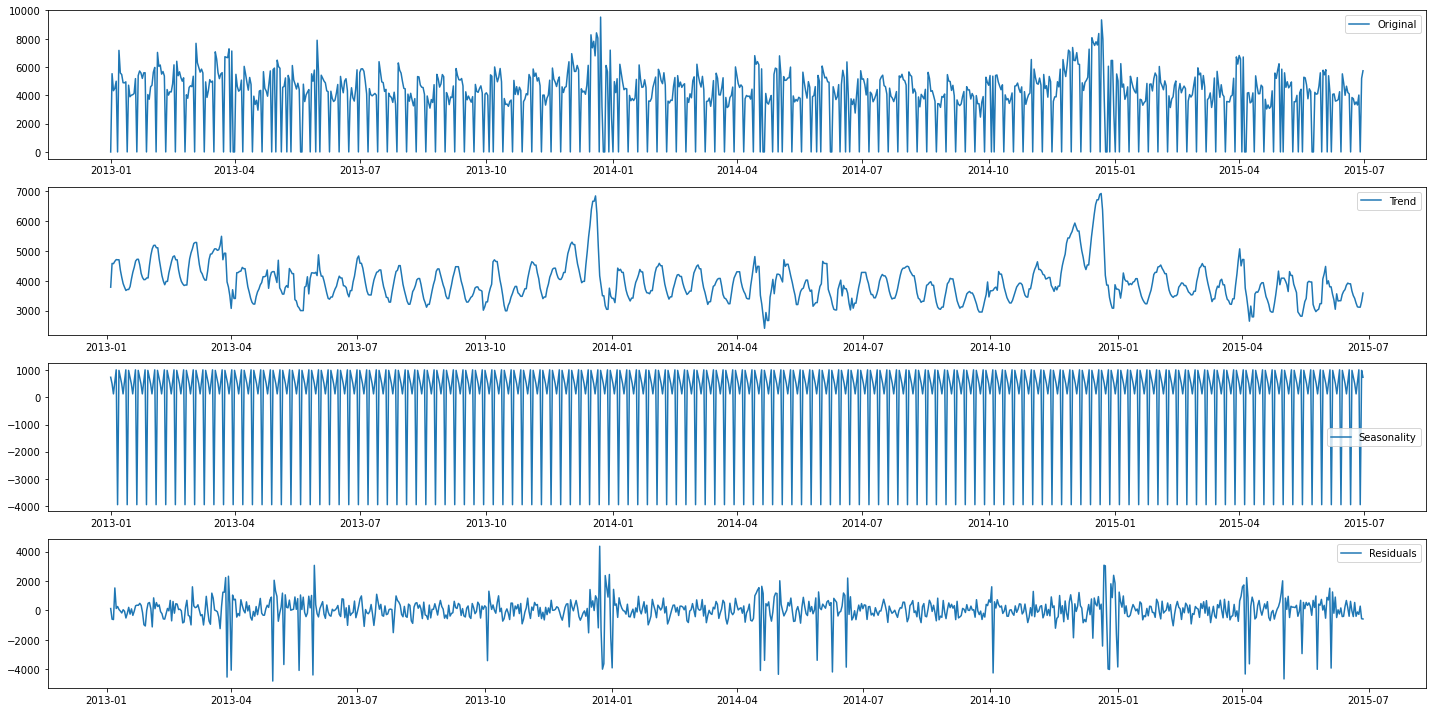

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_sale_train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_sale_train, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

##### Testing Data Process

In [37]:
test_df_ = pd.read_csv(path + "test_data_hidden\\test_data_hidden.csv", index_col='Date',parse_dates=True)

df_sale_test = test_df_[test_df_['Store'] == 1]
df_sale_test = df_sale_test[['Sales']]
df_sale_test.index=pd.to_datetime(df_sale_test.index)

##### ARIMA Model

##### Finding the value of the p parameter

###### ***The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part. 

C:\Users\deyat\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


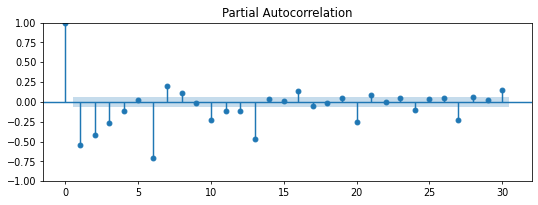

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':70})
plot_pacf(df_sale_train.Sales.diff().dropna());

###### ***Here we can see that the first four lags are significantly out of the limit and the fifth one is also out of the significant limit but it is not that far so we can select the order of the p as 4. 

##### Augmented Dickey-Fuller (ADF) Test

In [39]:
# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller
 
# extracting only the passengers count using values function
values = df_sale_train['Sales']
 
# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -4.316975
p-value: 0.000415
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569


##### ***Why ADF Test is Needed ?

###### ***Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
###### *** Here we can see that the p-value is less than 0.05 this means our null hypothesis will not be rejected and we will take this series as stationary.

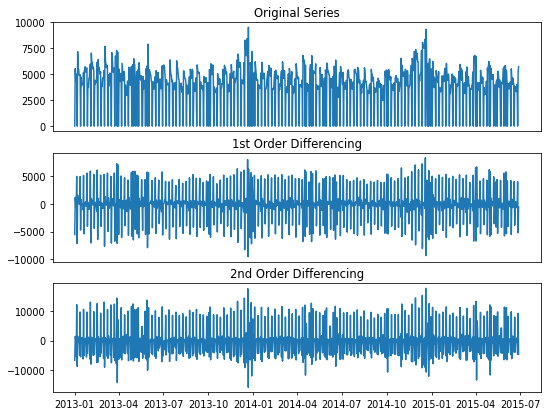

In [40]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':70})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_sale_train.Sales); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_sale_train.Sales.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_sale_train.Sales.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

##### Finding the value of the q parameter

###### ***To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series. 

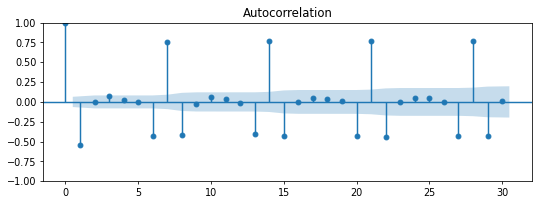

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':70})
plot_acf(df_sale_train.Sales.diff().dropna());

###### ***Here we can see that 2 of the lags are out of the significance limit so we can say that the optimal value of our q (MA) is 2. 

##### Fitting ARIMA Model using abive identified p,d,q values

In [42]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_sale_train['Sales'],order=(4,0,2))
results = model.fit()
results.summary()

C:\Users\deyat\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\deyat\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deyat\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\deyat\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deyat\AppData\Roaming\Python\Python38\site-pa

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  911
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -8073.461
Date:                Fri, 09 Dec 2022   AIC                          16162.921
Time:                        10:25:28   BIC                          16201.437
Sample:                             0   HQIC                         16177.626
                                - 911                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3946.8581    106.405     37.093      0.000    3738.308    4155.408
ar.L1         -0.5166      0.038    -13.465      0.000      -0.592      -0.441
ar.L2         -0.7569      0.045    -16.928      0.000      -0.845      -0.669
ar.L3          0.0500      0.043      1.170      0.242      -0.034       0.134
ar.L4          0.2746      0.041      6.771      0.000       0.195       0.354
ma.L1          0.4343      0.009     47.679      0.000       0.416       0.452
ma.L2          0.9898      0.011     86.221      0.000       0.967       1.012
sigma2      3.695e+06      0.007   5.51e+08      0.000     3.7e+06     3.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):                 3.58
Prob(Q):                              0.29   Prob(JB):                         0.17
Heteroskedasticity (H):               0.90   Skew:                            -0.15
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+24. Standard errors may be unstable.
"""

In [43]:
# Obtain predicted values
start=len(df_sale_train['Sales'])
end=len(df_sale_train['Sales'])+len(df_sale_test['Sales'])-1

In [44]:
predictions = results.predict(start=start, end=end, dynamic=False).rename('ARIMA(1,1,1) Predictions')

df_sale_test['ARIMA_Forecasted_Sales'] = predictions.values
df_sale_test['ARIMA_Forecasted_Sales'] = df_sale_test['ARIMA_Forecasted_Sales'].astype(int)
df_sale_test

C:\Users\deyat\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Sales,ARIMA_Forecasted_Sales
Date,,
2015-07-31,5263,5351
2015-07-30,5020,1030
2015-07-29,4782,4627
2015-07-28,5011,4789
2015-07-27,6102,3236
2015-07-26,0,2909
2015-07-25,4364,5249
2015-07-24,3706,4255
2015-07-23,3769,2555


#### Q.7. Dimensional Reduction techniques like, PCA and Tree’s Hyperparameter Tuning will be required. Cross-validate to find the best parameters. Infer the performance of both the models.

##### PCA for Selecting Top Components

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = training_df_encode[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y_train = training_df_encode['Sales']

X_test = test_df[['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y_test = test_df['Sales']
    
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

##### Selected Important Features using PCA

In [46]:
import numpy as np
# number of components
n_pcs= pca.components_.shape[0]
print ("Number of Principal Components : ", n_pcs)

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
print ("most_important_feature_index : ", most_important)

initial_feature_names = ['Store', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print ("most_important_names : ", most_important_names)

Number of Principal Components :  2
most_important_feature_index :  [1, 0]
most_important_names :  ['Customers', 'Store']


#### Q.8. Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Plot styling

In [48]:
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [49]:
training_df = pd.read_csv(path + "train_data\\train_data.csv")

from sklearn import preprocessing
from copy import deepcopy

training_df_encode = deepcopy(training_df)
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(str)
le = preprocessing.LabelEncoder()
training_df_encode['StateHoliday'] = le.fit_transform(training_df_encode['StateHoliday'].fillna(""))
training_df_encode['StateHoliday'] = training_df_encode['StateHoliday'].astype(int)

StateHoliday_LE_Map = dict(zip(le.classes_, le.transform(le.classes_)))
StateHoliday_LE_Map_reverse = dict(zip(le.transform(le.classes_), le.classes_))



<ipython-input-49-16a059a1dc66>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  training_df = pd.read_csv(path + "train_data\\train_data.csv")


In [50]:
training_df_encode.shape

(982644, 9)

In [51]:
test_df = pd.read_csv(path + "test_data_hidden\\test_data_hidden.csv")
test_df['StateHoliday'] = test_df['StateHoliday'].map(StateHoliday_LE_Map_reverse)

In [52]:
test_df.shape

(34565, 9)

In [53]:
training_df_encode = training_df_encode.append(test_df)
training_df_encode.shape

<ipython-input-53-1b3f81e811cf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df_encode = training_df_encode.append(test_df)


(1017209, 9)

In [54]:
df_sale_train = training_df_encode[['Sales', 'Customers']]

In [55]:
df_sale_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0


##### Visualizing the data - displot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'sales / customers')

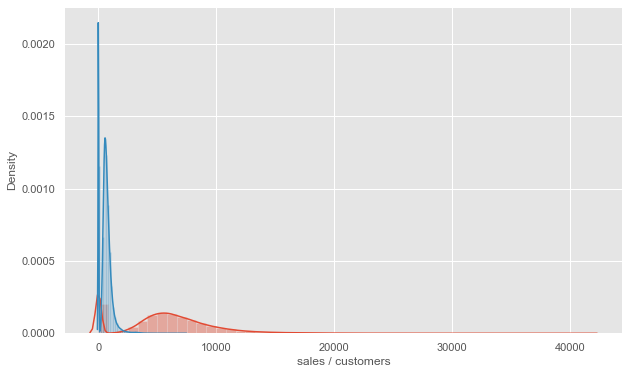

In [56]:
plot_sales = sns.distplot(df_sale_train["Sales"])
plot_customers = sns.distplot(df_sale_train["Customers"])
plt.xlabel('sales / customers')

##### Using the elbow method to find the optimum number of clusters

In [61]:
X = df_sale_train.iloc[: , :].values

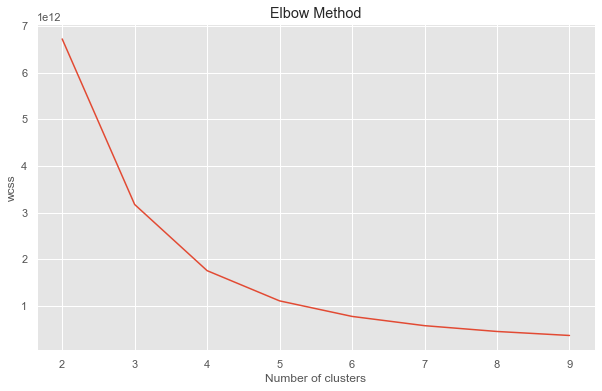

In [66]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,10):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(2,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

##### Fitting the k-means to the dataset with k=4

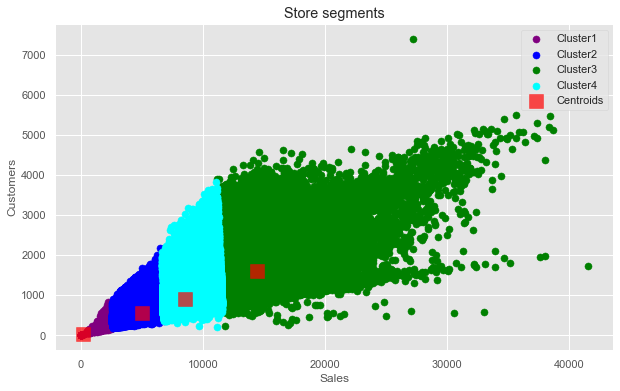

In [67]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Store segments')
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.legend()
plt.show()

##### Q.9. Is it possible to have separate prediction models for each cluster? Compare results with the previous models.

In [68]:
km4.labels_

array([1, 3, 2, ..., 3, 2, 3])

In [69]:
len(km4.labels_)

1017209

In [70]:
training_df_encode['Cluster_Label'] = list(km4.labels_)

In [71]:
training_df_encode.shape

(1017209, 10)

In [72]:
training_df_encode.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Cluster_Label
0,1,2,2015-06-30,5735,568,1,1,0,0,1
1,2,2,2015-06-30,9863,877,1,1,0,0,3
2,3,2,2015-06-30,13261,1072,1,1,0,1,2
3,4,2,2015-06-30,13106,1488,1,1,0,0,2
4,5,2,2015-06-30,6635,645,1,1,0,0,1


##### Random Forest Regression Model

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_training(X_train, y_train):
    regr = RandomForestRegressor(max_depth=25, random_state=42)
    regr.fit(X_train, y_train)
    return regr

In [74]:
def model_predict(X_test, regr):
    y_pred = regr.predict(X_test)
    return list(y_pred)

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_performance(y_test, y_pred, mse, mae, r2, regr):
        
#     try:
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # The mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2

In [76]:
def model_for_all_or_each_store(training_df, test_df):
        # Splitting Training Data
        X_train = training_df[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_train = list(training_df['Sales'])
#         print ("y_train : ", y_train)

        # Splitting Testing Data
        X_test = test_df[['Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
        y_test = list(test_df['Sales'])
        
        
        # Model Training
        regr = model_training(X_train, y_train)

        # Prediction
        y_pred = model_predict(X_test, regr)

        # Performance Measurement
        mse = mae = r2 = 0
        mse, mae, r2 = model_performance(y_test, y_pred, mse, mae, r2, regr)
        
        return y_pred, mse, mae, r2

###### Train - Test Data Splitting & Run The Model


In [77]:
train_set, test_set = training_df_encode[0:-34565].values, training_df_encode[-34565:].values

In [78]:
train_set

array([[1, 2, '2015-06-30', ..., 0, 0, 1],
       [2, 2, '2015-06-30', ..., 0, 0, 3],
       [3, 2, '2015-06-30', ..., 0, 1, 2],
       ...,
       [1113, 2, '2013-01-01', ..., 1, 1, 0],
       [1114, 2, '2013-01-01', ..., 1, 1, 0],
       [1115, 2, '2013-01-01', ..., 1, 1, 0]], dtype=object)

In [79]:
train_df_cluster = pd.DataFrame(data=train_set, columns=["Store", "DayOfWeek", "Date", "Sales", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday", "Cluster_Label"])
train_df_cluster = train_df_cluster.reset_index(drop=True)

test_df_cluster = pd.DataFrame(data=test_set, columns=["Store", "DayOfWeek", "Date", "Sales", "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday", "Cluster_Label"])
test_df_cluster = test_df_cluster.reset_index(drop=True)

In [80]:
train_df_cluster.shape

(982644, 10)

In [81]:
test_df_cluster.shape

(34565, 10)

In [82]:
train_df_cluster = train_df_cluster[train_df_cluster['Cluster_Label'].astype(int) == 0]
test_df_cluster = test_df_cluster[test_df_cluster['Cluster_Label'].astype(int) == 0]

In [83]:
print(train_df_cluster.shape)
print(test_df_cluster.shape)

(186485, 10)
(4916, 10)


##### For Cluster 0

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred, mse, mae, r2 = model_for_all_or_each_store(train_df_cluster, test_df_cluster)
print('Mean squared error: %.2f'%mse )
print('Mean Absolute Error: %.2f'%mae)
print('R-Square Score: %.2f'%r2)

Mean squared error: 5609.28
Mean Absolute Error: 20.12
R-Square Score: 0.99
